# Semantic segmentation

  1. **Image segmentation task**: It divides an image into multiple segments or regions, each representing a coherent and visually meaningful object or part of the image.
  2. **Semantic segmentation task**: it classifies each pixel of the input image as a semantic category
  3. **Instance segmentation**: it classifies each input image pixel as an object-instance. Thus, it recognizes the semantics and instance.




### Encoder-Decoder and Segmentation head
  1. **Encoder**: Given a input vector, it summarize, filter, extract useful information, or create a lower dimension representation
  2. **Decoder** Takes the abstract features from the encoder and produce a pixel-wise classification map with the same spatial dimensions as the input image
  3. **Analogy**: Given a summary information (Encoder), how to reconstruct the complete one (Decoder)?
  4. **Analogy**: Given a small puzzle, how to create a large version of it?
  5. Transposed Convolutional layer

  ##### References:
    1. Dumoulin, Vincent, and Francesco Visin. "A guide to convolution arithmetic for deep learning." arXiv preprint arXiv:1603.07285 (2016).
    2. https://towardsdatascience.com/what-is-transposed-convolutional-layer-40e5e6e31c11
    3. https://d2l.ai/chapter_computer-vision/transposed-conv.html



### **Loss**

#### **Pixel-wise Cross-entropy loss**
It is used to train neural networks for semantic segmentation. It computes the loss for each pixel individually and then aggregates these losses to quantify the overall quality of the segmentation.

It is designed to measure the dissimilarity between the predicted pixel-wise class probabilities and the ground truth labels in an image.

<img src='https://www.jeremyjordan.me/content/images/2018/05/Screen-Shot-2018-05-24-at-10.46.16-PM.png'>


#### **Dice score loss**
It denotes the overlap between the output and target mask, and ranges from 0 to 1.

  1. Dice score = $\frac{2 \times |A \cap B|}{|A| + |B|}$
  

Reference

1. https://www.jeremyjordan.me/semantic-segmentation/#loss
2. https://medium.com/mlearning-ai/understanding-evaluation-metrics-in-medical-image-segmentation-d289a373a3f#:~:text=The%20difference%20between%20the%20two,of%20pixel%20in%20both%20images.




### Evaluate metrics (IoU, ...)
  1. Dice Similarity Coefficient     
  2. Hausdorff Surface Distance              
  3. Sensitivity (TP)         
  4. Specificity (TN)         
  5. Precision   
  4. Dice score vs IoU score
  
  Dice score penalizes false positives (extra predicted area) more than false negatives (missing predicted area), which is relevant when dealing with small objects like tumors. For small masks, the intersection area can be very small, even if the predicted mask is quite accurate. This can lead to a lower IoU score, making it difficult to accurately assess the quality of the segmentation, especially when the masks are small compared to the entire image.

  In some cases, both metrics may provide similar insights, but in others, the Dice score can offer a more nuanced perspective, particularly when dealing with small and complex object segmentation.

# Segmentation Models Pytorch

1. Introduction to SMP library
2. https://github.com/qubvel/segmentation_models.pytorch/tree/master
3. https://smp.readthedocs.io/en/latest/
4. Tutorial based on https://github.com/qubvel/segmentation_models.pytorch/blob/master/examples/cars%20segmentation%20(camvid).ipynb

# Install requirements

In [1]:
! pip install segmentation-models-pytorch

/bin/bash: /home/matheusalb/anaconda3/envs/llm/lib/libtinfo.so.6: no version information available (required by /bin/bash)

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import segmentation_models_pytorch as smp

model = smp.Unet(
    encoder_name="resnet34", 
    #encoder_weights="imagenet",
    encoder_weights=None,
    in_channels=1,
    classes=12, # Atribuo 12 classes para o modelo
)

In [3]:
model.cuda()

Unet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [4]:
import torch

#Random grey-scale image with 224*224 (width x height) pixels
x = torch.randn(1, 1, 224, 224)

#Forward
output = model(x.cuda())
print('Raw output shape:', output.shape)

#Output argmax
pixel_pred = output.argmax(1)
print('Pixel prediction shape:', pixel_pred.shape)

Raw output shape: torch.Size([1, 12, 224, 224])
Pixel prediction shape: torch.Size([1, 224, 224])


In [5]:
pixel_pred

tensor([[[10,  9,  9,  ...,  9,  9,  9],
         [ 0,  9,  9,  ...,  9,  9,  9],
         [ 1,  9,  9,  ...,  5,  9,  9],
         ...,
         [ 0,  2,  6,  ...,  5,  2,  6],
         [ 3,  0,  0,  ...,  9,  2,  7],
         [ 2,  2,  6,  ...,  9,  9,  8]]], device='cuda:0')

# Dataset

1. [Cambridge-driving Labeled Video Database (CamVid)](http://mi.eng.cam.ac.uk/research/projects/VideoRec/CamVid/)
2. Almost ten minutes of video
3. 32 semantic labels (Animal, Pedestrian, Child, Rolling cart/luggage/pram, Bicyclist, Motorcycle/scooter, Car (sedan/wagon), SUV / pickup truck, Truck / bus, Train, Misc, Road == drivable surface, Shoulder, Lane markings drivable,
Non-Drivable, Sky, Tunnel, Archway, Building, Wall, Tree, Vegetation misc.,
Fence, Sidewalk, Parking block, Column/pole, Traffic cone, Bridge, Sign / symbol, Misc text, Traffic light, Other)

#### Download

In [6]:
import os


DATA_DIR = './data/CamVid/'

# load repo with data if it is not exists
if not os.path.exists(DATA_DIR):
    print('Loading data...')
    os.system('git clone https://github.com/alexgkendall/SegNet-Tutorial ./data')
    print('Done!')

x_train_dir = os.path.join(DATA_DIR, 'train')
y_train_dir = os.path.join(DATA_DIR, 'trainannot')

x_valid_dir = os.path.join(DATA_DIR, 'val')
y_valid_dir = os.path.join(DATA_DIR, 'valannot')

x_test_dir = os.path.join(DATA_DIR, 'test')
y_test_dir = os.path.join(DATA_DIR, 'testannot')

In [7]:
x_train_dir

'./data/CamVid/train'

## Dataset loader

1. Imports
2. Custom Dataset to read CamVid

In [8]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

### Building a custom torch.utils.data.Dataset to read the CamVidDataset

In [9]:
class CamVidDataset(Dataset):
    """CamVid Dataset. Read images, apply augmentation and preprocessing transformations.

    Args:
        images_dir (str): path to images folder
        masks_dir (str): path to segmentation masks folder
        classes (list): values of classes to extract from segmentation mask
        augmentation (albumentations.Compose): data transfromation pipeline
            (e.g. flip, scale, etc.)
        preprocessing (albumentations.Compose): data preprocessing
            (e.g. noralization, shape manipulation, etc.)

    """

    CLASSES = ['sky', 'building', 'pole', 'road', 'pavement',
               'tree', 'signsymbol', 'fence', 'car',
               'pedestrian', 'bicyclist', 'unlabelled']

    def __init__(
            self,
            images_dir,
            masks_dir,
            classes=None,
            augmentation=None,
            preprocessing=None,
    ):
        self.ids = os.listdir(images_dir)
        self.images_fps = [os.path.join(images_dir, image_id) for image_id in self.ids]
        self.masks_fps = [os.path.join(masks_dir, image_id) for image_id in self.ids]

        # convert str names to class values on masks
        self.class_values = [self.CLASSES.index(cls.lower()) for cls in classes]

        self.augmentation = augmentation
        self.preprocessing = preprocessing

    def __getitem__(self, i):
        # read image
        image = cv2.imread(self.images_fps[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # read mask
        mask = cv2.imread(self.masks_fps[i], 0)

        # Build a binary mask for each class
        masks = [(mask == v) for v in self.class_values]
        mask = np.stack(masks, axis=-1).astype('float')

        # apply augmentations
        if self.augmentation:
            sample = self.augmentation(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']

        # apply preprocessing
        if self.preprocessing:
            sample = self.preprocessing(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']

        return image, mask

    def visualize_sample(self, i):
      image, mask = self[i] #same as self.__getitem__(i)

      print("Type of image and mask:", type(image), type(mask))
      print("Checking if image is np.ndarray:", isinstance(image, np.ndarray))
      print("Shape of image and mask:", image.shape, mask.shape)

      """PLot images in one row."""

      fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(16, 5))
      axs[0].imshow(image)
      axs[1].imshow(mask)
      plt.show()

    def __len__(self):
        return len(self.ids)

#### Instance of our CamVidDataset class

In [10]:
dataset = CamVidDataset(
    x_train_dir,
    y_train_dir,
    classes=['car'],
    augmentation=None,
    preprocessing=None,
  )

#### Visualizing the CamVidDataset samples

[0. 1.]
Type of image and mask: <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Checking if image is np.ndarray: True
Shape of image and mask: (360, 480, 3) (360, 480, 1)


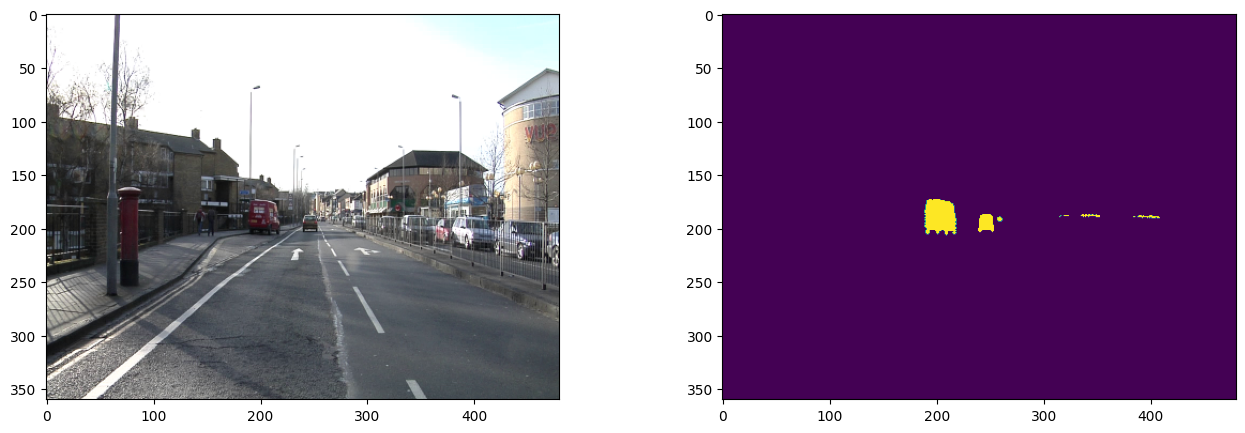

In [11]:
fps_idx = 10

image, mask = dataset[fps_idx] # get some sample
print(np.unique(mask))

dataset.visualize_sample(fps_idx)

In [12]:
import albumentations as albu

def get_training_augmentation():
    """
    These augmentations functions are called by
    CamVidDataset.__getitem__ -> augmentation(image=image, mask=mask)
    """
    width = 320
    height = 320
    train_transform = [
        albu.HorizontalFlip(p=0.5),
        albu.ShiftScaleRotate(
            scale_limit=0.5, rotate_limit=0,
            shift_limit=0.1, p=0.5, border_mode=0
            ),
        albu.PadIfNeeded(
            min_height=height, min_width=width,
            always_apply=True, border_mode=0
            ),
        albu.RandomCrop(height=height, width=width, always_apply=False),
        albu.IAAAdditiveGaussianNoise(p=0.2),
        albu.IAAPerspective(p=0.5),
        albu.OneOf(
            [
                albu.CLAHE(p=1),
                albu.RandomBrightness(p=1),
                albu.RandomGamma(p=1),
            ],
            p=0.5,
        ),
        albu.OneOf(
            [
                albu.Blur(blur_limit=3, p=1),
                albu.MotionBlur(blur_limit=3, p=1),
            ],
            p=0.5,
        ),
        albu.OneOf(
            [
                albu.RandomContrast(p=1),
                albu.HueSaturationValue(p=1),
            ],
            p=0.5,
        ),
    ]

    return albu.Compose(train_transform)


def get_validation_augmentation():
    """Add paddings to make image shape divisible by 32"""
    test_transform = [
        albu.PadIfNeeded(384, 480)
    ]
    return albu.Compose(test_transform)


def to_tensor(x, **kwargs):
    """
    Given a numpy array x of shape (H, W, C), it transpose the array
    to (C, H, W) and convert the data type to float32.
    """
    return x.transpose(2, 0, 1).astype('float32')


def get_preprocessing(preprocessing_fn):
    """Construct preprocessing transform

    Args:
        preprocessing_fn (callbale): data normalization function
            (can be specific for each pretrained neural network)
    Return:
        transform: albumentations.Compose

    """

    #Lambda documentation: https://albumentations.ai/docs/api_reference/augmentations/transforms/#albumentations.augmentations.transforms.Lambda
    _transform = [
        albu.Lambda(name='preprocessing', image=preprocessing_fn),
        albu.Lambda(name='totensor', image=to_tensor, mask=to_tensor),
    ]
    return albu.Compose(_transform)

#### Visualizing images from augmented dataset

In [13]:
augmented_dataset = CamVidDataset(
    x_train_dir,
    y_train_dir,
    classes=['car'],
    augmentation=get_training_augmentation(),
    preprocessing=None,
)

/home/matheusalb/anaconda3/envs/llm/lib/python3.11/site-packages/albumentations/imgaug/transforms.py:261: FutureWarning: IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead
  warnings.warn("IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead", FutureWarning)
/home/matheusalb/anaconda3/envs/llm/lib/python3.11/site-packages/albumentations/imgaug/transforms.py:384: FutureWarning: This IAAPerspective is deprecated. Please use Perspective instead
  warnings.warn("This IAAPerspective is deprecated. Please use Perspective instead", FutureWarning)
/home/matheusalb/anaconda3/envs/llm/lib/python3.11/site-packages/albumentations/augmentations/transforms.py:1258: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/home/matheusalb/anaconda3/envs/llm/lib/python3.11/site-packages/albumentations/augmentations/transforms.py:1284: FutureWarning: RandomContrast has been deprecated. Please use RandomBrightnessContrast
  w

Type of image and mask: <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Checking if image is np.ndarray: True
Shape of image and mask: (320, 320, 3) (320, 320, 1)


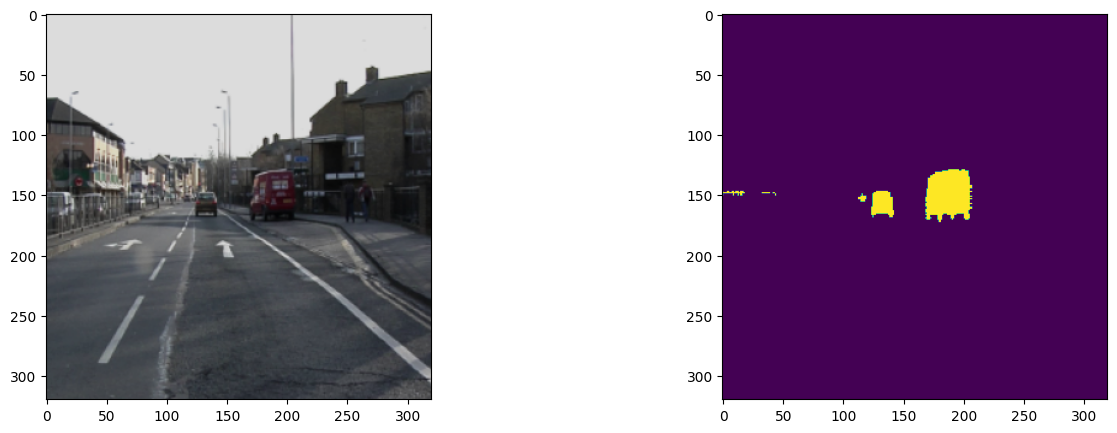

Type of image and mask: <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Checking if image is np.ndarray: True
Shape of image and mask: (320, 320, 3) (320, 320, 1)


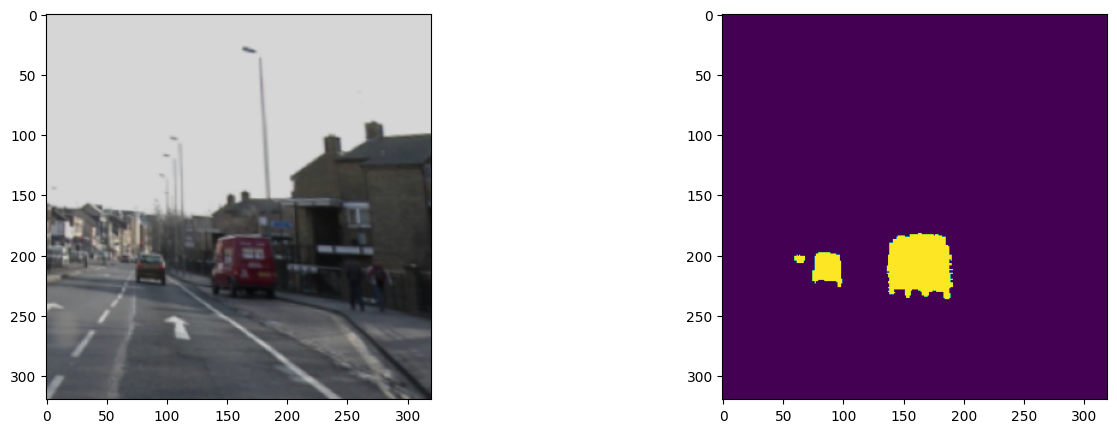

Type of image and mask: <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Checking if image is np.ndarray: True
Shape of image and mask: (320, 320, 3) (320, 320, 1)


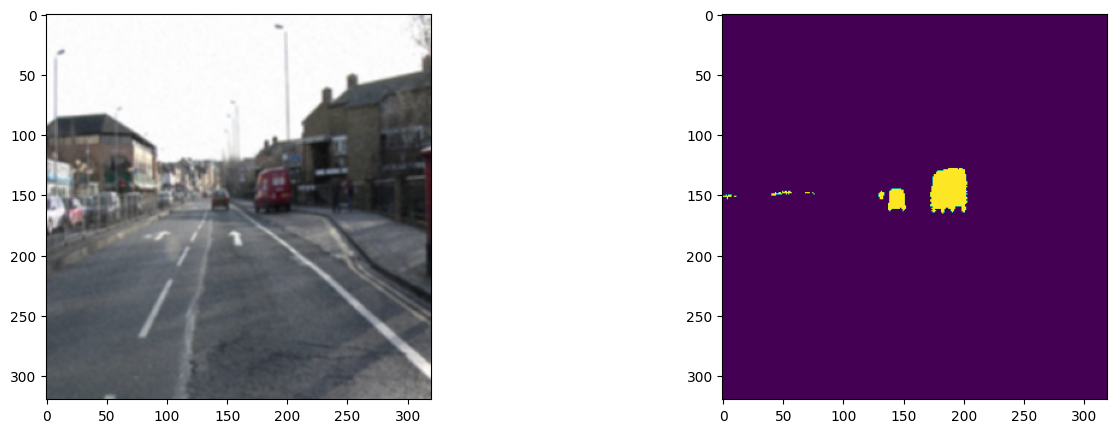

In [14]:
fps_idx = 10
# same image with different augmentation run
for i in range(3):
    augmented_dataset.visualize_sample(fps_idx)

# Model and Training

### Training function

In [15]:
from tqdm.notebook import tqdm

def epoch(dataloader, model, loss, optimizer, metrics):
  model.cuda()
  model.train()

  total_loss = 0.0
  total_metrics = {}
  num_batches = 0

  for metric_fn in metrics:
    metric_name = metric_fn.__name__
    total_metrics[metric_name] = 0

  for x, y in tqdm(dataloader):
    x, y = x.cuda(), y.cuda()

    optimizer.zero_grad()
    prediction = model.forward(x)

    loss_batch = loss(prediction, y)
    loss_batch.backward()

    optimizer.step()

    # update loss logs
    loss_value = loss_batch.cpu().detach().numpy()
    total_loss += loss_value


    # update metrics logs
    for metric_fn in metrics:
        metric_value = metric_fn(prediction, y).cpu().detach().numpy()
        metric_name = metric_fn.__name__
        total_metrics[metric_fn.__name__] += metric_value

    num_batches += 1

  for metric in total_metrics.keys():
    total_metrics[metric] /= num_batches

  return total_loss/num_batches, total_metrics

### Setup

1. Hyperparameters
2. Model architecture
3. Datasets
4. Dataloaders
5. Loss
6. Metrics
7. Optimizer

In [16]:
import torch
import numpy as np
import segmentation_models_pytorch as smp
from segmentation_models_pytorch import utils

ENCODER = 'resnet50'
ENCODER_WEIGHTS = 'imagenet'
CLASSES = ['sky', 'building', 'pole', 'road', 'pavement',
        'tree', 'signsymbol', 'fence', 'car',
        'pedestrian', 'bicyclist', 'unlabelled']
ACTIVATION = 'sigmoid'
DEVICE = 'cuda'

# create segmentation model with pretrained encoder
model = smp.Unet(
    encoder_name=ENCODER,
    encoder_weights=ENCODER_WEIGHTS,
    classes=len(CLASSES),
    activation=ACTIVATION,
)

preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)


train_dataset = CamVidDataset(
    x_train_dir,
    y_train_dir,
    augmentation=get_training_augmentation(),
    preprocessing=get_preprocessing(preprocessing_fn),
    classes=CLASSES,
)

valid_dataset = CamVidDataset(
    x_valid_dir,
    y_valid_dir,
    augmentation=get_validation_augmentation(),
    preprocessing=get_preprocessing(preprocessing_fn),
    classes=CLASSES,
)

train_loader = DataLoader(
    train_dataset,
    batch_size=8,
    shuffle=True,
    num_workers=2
    )

valid_loader = DataLoader(
    valid_dataset,
    batch_size=1,
    shuffle=False,
    num_workers=2
    )

loss = smp.losses.DiceLoss(mode='multilabel')

metrics = [
    utils.metrics.IoU(threshold=0.5),
    utils.metrics.Precision(threshold=0.5),
    utils.metrics.Recall(threshold=0.5),
]

optimizer = torch.optim.Adam(params=model.parameters(), lr=0.0001)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/matheusalb/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:03<00:00, 27.6MB/s]
/home/matheusalb/anaconda3/envs/llm/lib/python3.11/site-packages/albumentations/imgaug/transforms.py:261: FutureWarning: IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead
  warnings.warn("IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead", FutureWarning)
/home/matheusalb/anaconda3/envs/llm/lib/python3.11/site-packages/albumentations/imgaug/transforms.py:384: FutureWarning: This IAAPerspective is deprecated. Please use Perspective instead
  warnings.warn("This IAAPerspective is deprecated. Please use Perspective instead", FutureWarning)
/home/matheusalb/anaconda3/envs/llm/lib/python3.11/site-packages/albumentations/augmentations/transforms.py:1258: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/home/m

In [17]:
preprocessing_fn

functools.partial(<function preprocess_input at 0x7fb70a0a4680>, input_space='RGB', input_range=[0, 1], mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

### Training loop

In [18]:
num_epochs = 30
for i in range(num_epochs):
  total_loss, total_metrics = epoch(train_loader, model, loss, optimizer, metrics)
  print('Epoch: ', i)
  print('Total loss:', total_loss)
  print('Total metrics:', total_metrics)
  print()
  if i > 0 and i % 10 == 0:
    optimizer.param_groups[0]['lr'] = 1e-5
    print('Decrease decoder learning rate to 1e-5!')

  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  0
Total loss: 0.87069738170375
Total metrics: {'iou_score': 0.12408409170482469, 'precision': 0.12727938835387645, 'recall': 0.8122952645239623}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  1
Total loss: 0.8674437157485796
Total metrics: {'iou_score': 0.17098519432803858, 'precision': 0.17293951142093408, 'recall': 0.937762861666472}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  2
Total loss: 0.8638690308384274
Total metrics: {'iou_score': 0.1982048532885054, 'precision': 0.20054788110048874, 'recall': 0.944003357835438}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  3
Total loss: 0.8613537148289059
Total metrics: {'iou_score': 0.21412621503290924, 'precision': 0.2165589883275654, 'recall': 0.9499523911787116}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  4
Total loss: 0.8560598168684088
Total metrics: {'iou_score': 0.23365790299747302, 'precision': 0.2362669988170914, 'recall': 0.9549796360990276}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  5
Total loss: 0.8558353716912477
Total metrics: {'iou_score': 0.23949996220028918, 'precision': 0.2420354404527208, 'recall': 0.9578969284244205}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  6
Total loss: 0.8545798620452052
Total metrics: {'iou_score': 0.2478624297224957, 'precision': 0.2510240570358608, 'recall': 0.951184560423312}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  7
Total loss: 0.8520608259283978
Total metrics: {'iou_score': 0.25669998643190967, 'precision': 0.259442870059739, 'recall': 0.9604537292667057}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  8
Total loss: 0.8501680545184923
Total metrics: {'iou_score': 0.26038941676202026, 'precision': 0.26328476064878964, 'recall': 0.959378438151401}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  9
Total loss: 0.8520042481629745
Total metrics: {'iou_score': 0.2627531886100769, 'precision': 0.26566168115190836, 'recall': 0.9597985899966696}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  10
Total loss: 0.8490676361581554
Total metrics: {'iou_score': 0.26970172576282336, 'precision': 0.2726142678571784, 'recall': 0.9617191281007684}

Decrease decoder learning rate to 1e-5!


  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  11
Total loss: 0.8499343550723532
Total metrics: {'iou_score': 0.2883790747626968, 'precision': 0.29133634334025177, 'recall': 0.9658118758512579}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  12
Total loss: 0.8469614865987197
Total metrics: {'iou_score': 0.29623953285424603, 'precision': 0.2994077652692795, 'recall': 0.965459968732751}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  13
Total loss: 0.8507742674454398
Total metrics: {'iou_score': 0.2986802283836448, 'precision': 0.301759607118109, 'recall': 0.9670198637506237}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  14
Total loss: 0.8474216072455697
Total metrics: {'iou_score': 0.3031455757825271, 'precision': 0.30607306568518927, 'recall': 0.9695296287536621}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  15
Total loss: 0.8464271205922832
Total metrics: {'iou_score': 0.3016492335692696, 'precision': 0.30456547957399616, 'recall': 0.9690794439419456}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  16
Total loss: 0.8500327610451243
Total metrics: {'iou_score': 0.30263349413871765, 'precision': 0.30559924698394275, 'recall': 0.9688107643438422}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  17
Total loss: 0.8476376520550769
Total metrics: {'iou_score': 0.3073446510926537, 'precision': 0.3103162672208703, 'recall': 0.9697959824748661}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  18
Total loss: 0.8456397834031478
Total metrics: {'iou_score': 0.3069892882005028, 'precision': 0.30984280355598615, 'recall': 0.9709685146808624}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  19
Total loss: 0.8485162297020787
Total metrics: {'iou_score': 0.3088140001763468, 'precision': 0.3117976059084353, 'recall': 0.97000935803289}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  20
Total loss: 0.8482699238735697
Total metrics: {'iou_score': 0.3082001125035079, 'precision': 0.31127061079377716, 'recall': 0.9689634390499281}

Decrease decoder learning rate to 1e-5!


  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  21
Total loss: 0.8471931193185889
Total metrics: {'iou_score': 0.31233264635438507, 'precision': 0.31530835382316424, 'recall': 0.9706792688888052}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  22
Total loss: 0.8500113461328589
Total metrics: {'iou_score': 0.3105225193759669, 'precision': 0.31345317091630853, 'recall': 0.9709076181701992}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  23
Total loss: 0.8479195314904918
Total metrics: {'iou_score': 0.3178158946659254, 'precision': 0.32107210483240045, 'recall': 0.9690296468527421}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  24
Total loss: 0.8492455974869106
Total metrics: {'iou_score': 0.31610923422419507, 'precision': 0.3191875303569047, 'recall': 0.9703541190727897}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  25
Total loss: 0.8497680464516515
Total metrics: {'iou_score': 0.31828154817871424, 'precision': 0.32143317033415253, 'recall': 0.9698985387449679}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  26
Total loss: 0.8503911637741587
Total metrics: {'iou_score': 0.31960989858793176, 'precision': 0.32275944624258124, 'recall': 0.9704437800075697}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  27
Total loss: 0.8451298501180566
Total metrics: {'iou_score': 0.32475107843461243, 'precision': 0.3280454880517462, 'recall': 0.9699628055095673}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  28
Total loss: 0.8490037399789562
Total metrics: {'iou_score': 0.3254886710125467, 'precision': 0.3286869694357333, 'recall': 0.97105004346889}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  29
Total loss: 0.8481304567793141
Total metrics: {'iou_score': 0.33061696524205414, 'precision': 0.3339321969643883, 'recall': 0.9707752932672915}



# Saving the model checkpoint

In [19]:
#summary = {'model_state...'}
torch.save(model.state_dict(), "Unet.pt")

# Pipeline to use the model

1. Load the model
2. Get image from validation dataset
3. Feed the model

In [20]:
loaded_unet = smp.Unet(
    encoder_name=ENCODER,
    encoder_weights=ENCODER_WEIGHTS,
    classes=len(CLASSES),
    activation=ACTIVATION,
)

loaded_unet.load_state_dict(torch.load("Unet.pt"))

<All keys matched successfully>

In [21]:
loaded_unet.cuda()
loaded_unet.eval()

Unet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
      

In [22]:
img_id = 50

x, target = next(iter(valid_loader))

print(type(x), type(target))
print(x.shape, target.shape)

output = loaded_unet(x.cuda())
output.shape

<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([1, 3, 384, 480]) torch.Size([1, 12, 384, 480])


torch.Size([1, 12, 384, 480])

1.0

In [26]:
# import matplotlib.pyplot as plt

# plt.plot(output.flatten().cpu().tolist())
# plt.xlabel('Pixel ID')
# plt.ylabel('Model output')
# plt.show()

In [25]:
# import matplotlib.pyplot as plt

# plt.plot((output.flatten() >= 0.5).cpu().tolist())
# plt.xlabel('Pixel ID')
# plt.ylabel('Binary model output')
# plt.show()

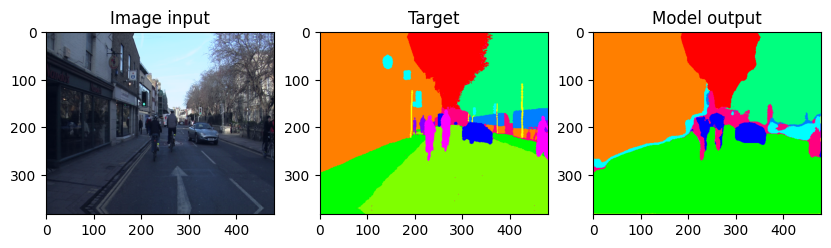

In [98]:
import matplotlib.colors as mcolors

def norm01(x):
  """
  Given an input vector x, it normalizes the vector to be between 0 and 1.
  """
  xmin = x.min()
  xmax = x.max()

  return (x - xmin)/(xmax - xmin)

def label_to_rgb(label_img, palette):
  """
  Convert label image to RGB using a specific color palette.
  """
  return palette[label_img]
  
def generate_color_map(num_classes):
  hues = np.linspace(0, 1, num_classes, endpoint=False)

  color_map = [mcolors.hsv_to_rgb([h, 1, 1]) for h in hues]
  
  color_map = np.array(color_map) * 255
  color_map = color_map.astype(np.uint8)

  return color_map


color_map = generate_color_map(12)

target_label = torch.argmax(target[0].permute(1, 2, 0).cpu().detach(), dim=2).numpy()
output_label = torch.argmax(output[0].permute(1, 2, 0).cpu().detach(), dim=2).numpy()

target_rgb = label_to_rgb(target_label, color_map)
output_rgb = label_to_rgb(output_label, color_map)

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(10, 10))
axs[0].imshow(norm01(x[0].permute(1, 2, 0).detach().cpu()))
axs[0].set_title('Image input')

axs[1].imshow(target_rgb)
axs[1].set_title('Target')

axs[2].imshow(output_rgb)
axs[2].set_title('Model output')

plt.show()